In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import lightkurve as lk

# Exoplanet properties - radius

This notebook covers how to determine the radius of a possible planet candidate. This is an important parameter as it can tell you a lot about what kind of planet the signal could belong to - is it a gassy or a rocky planet? It can also help to rule out false positives e.g. signals corresponding to objects larger than around 20 Earth radii are most likely not planets. We can determine the radius of a planet using the simple equation: 

$\textrm{area}_{planet} = \pi R_{planet}^{2}$

$\textrm{area}_{star} = \pi R_{star}^{2}$

$\textrm{transit depth} = \bigl(\frac{R_{planet}}{R_{star}}\biggr)^{2}$

**which brings us to the important equation:**

**$R_{planet} = \sqrt{\textrm{transit depth}} \times R_{star}$**


where:
- $R_{planet}$ is the radius of the planet
- $R_{star}$ is the radius of the star (you can look this up on ExoFOP) 
- The transit depth is determined from the plot as shown below


Notes:

- You need to run each cell. Do this by either pressing the 'run' button at the top of the page or pressing shift+enter (this is what Nora does in the videos). 

- When you run a cell, a star will appear in the brackets to the left of the cell while the cell is runnning. Once it has successfully completed running the code the star will turn into a number (often it runs so fast that you don't see the star).

- Text following a #, or within triple quotation marks (''') is ignored by the code (except in this cell because I made this into a text cell)


In [2]:
TIC = 'TIC 55525572' # !! CHANEG THIS to run code for a different TIC ID

In [3]:
# search the available data and select the data that you want

'''
(this is a comment and not code - for longer comments you can use tripple quotation marks)

the '[0:9]' below selects the first 9 available sectors but you will need to change this for different targets 
depending on the data available. To see what data is available start a new code cell and fill it with:

print (lk.search_lightcurve(TIC, author = 'SPOC'))

this will print the available sectors for a given target for you. You can then select either: 

1. a range of sectors using'[start, end]': 'lk.search_lightcurve(TIC, author = 'SPOC')[0:9]'

2. listing the sectors you want: 'lk.search_lightcurve(TIC, author = 'SPOC', sector = [5,6,8]'). (the square brackets are important!)

3. a single sector: 'lk.search_lightcurve(TIC, author = 'SPOC', sector = 5')

4. the first available secor: 'lk.search_lightcurve(TIC, author = 'SPOC')[0]'

'''

available_data_select = lk.search_lightcurve(TIC, author = 'SPOC')[0:9] # !! CHANEG THIS (see above)

# download the selected data and 'stitch' the data from the different sectors together
# if you only look at the data from one sector use 'available_data_select.download().normalize()' instead
lc_collection = available_data_select.download_all().stitch()


# define the orbital period and the time of the first transit event (T0)
# !! CHANGE THESE for different targets
period  = 83.8979 
t0 = 2125.847 # the date on ExoFOP is in JD so subtract 2457000.0 from the number on exoFOP to get to the value that we have here

# phase fold the light curve
lc_phased = lc_collection.fold(period = period, epoch_time = t0)

# bin the lightcurve to 15 minutes (divide by 24 and 60 to get into the units of days)
lc_phased_binned = lc_phased.bin(15/24/60)



<IPython.core.display.Javascript object>


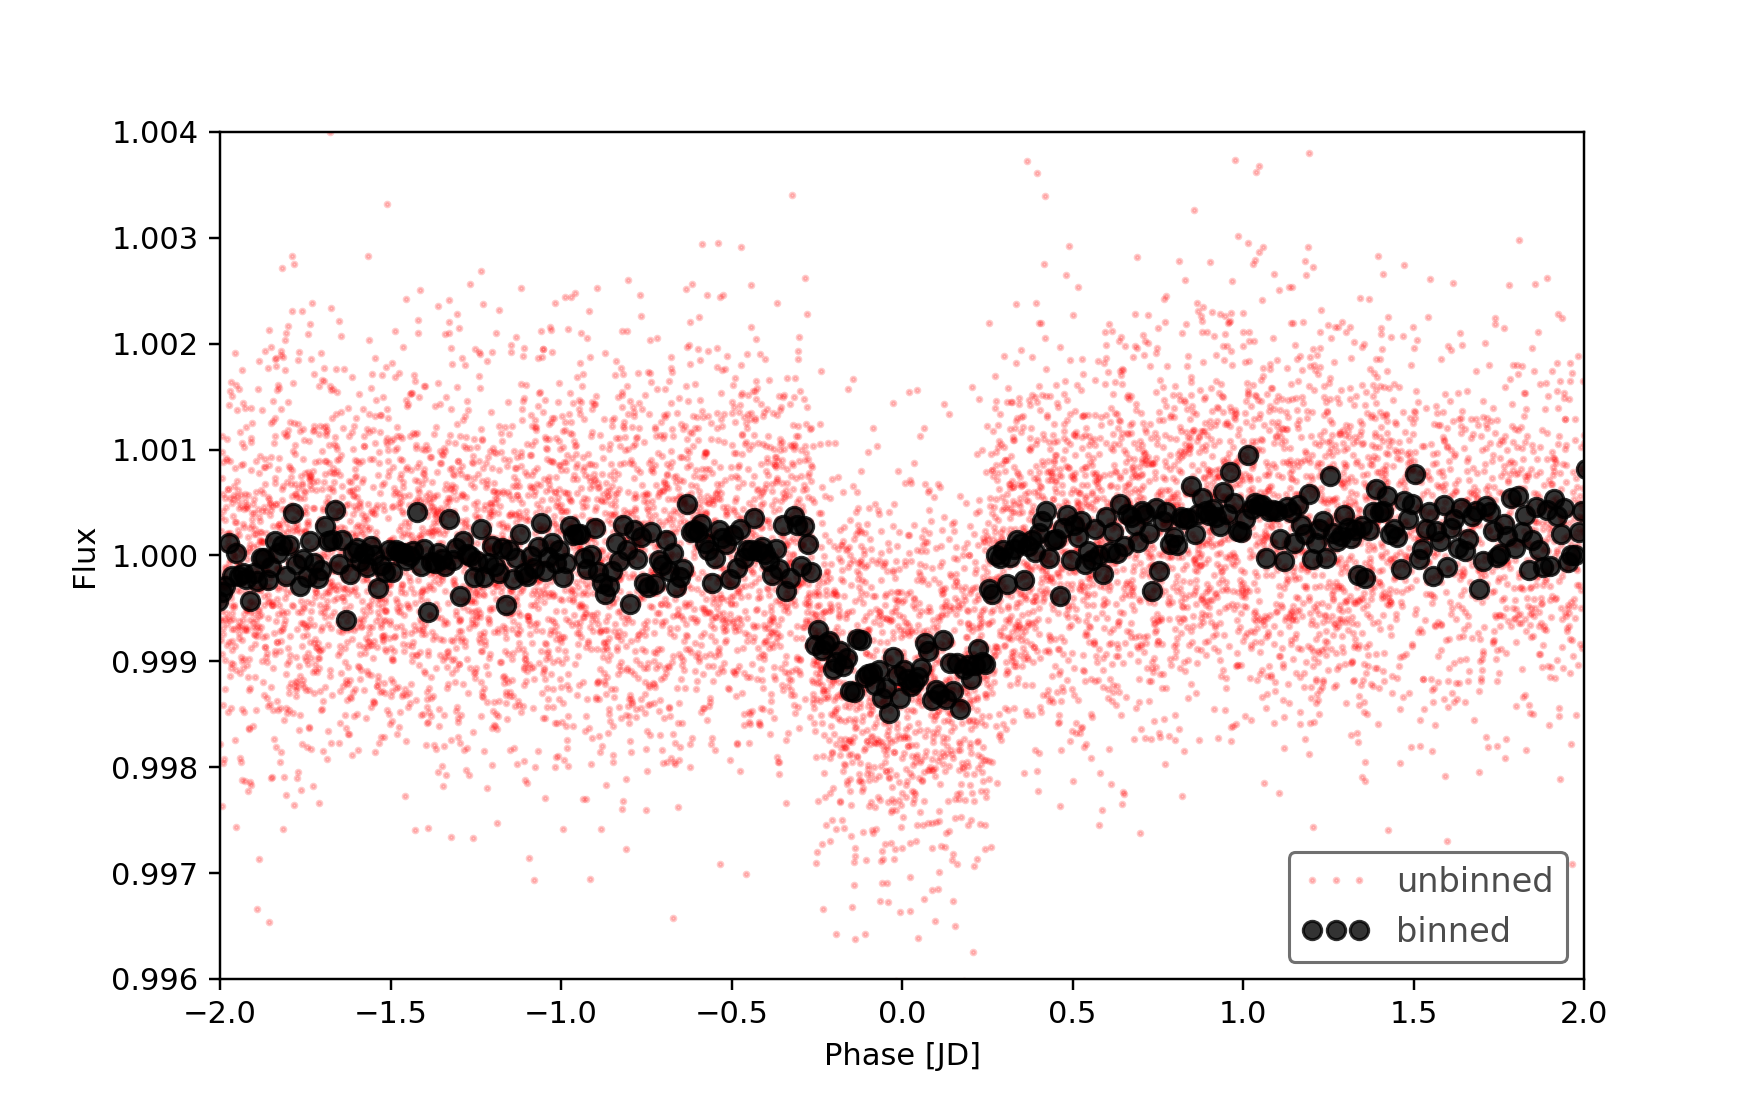

(0.996, 1.004)

In [4]:
# plot the binned and unbinned phase folded lightcurve on the same figure

fig, ax = plt.subplots(figsize = (8,5))

lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'red', alpha = 0.2, markersize = 3, label = 'unbinned')
lc_phased_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'k', alpha = 0.8, markersize = 6, label = 'binned')

# use plt.axhline() to plot a horizontal line on the figure. (Delete the hashtag in the line below to try this)
#plt.axhline(0.9988)

# define axis limits 
# !! CHANGE THESE axis limits for different targets
plt.xlim(-2,2)
plt.ylim(0.996, 1.004)

In [5]:
# import numpy and astropy - two very useful python modules 
from astropy import units as u
import numpy as np

In [6]:
'''from the phase folded figure above, determine the depth of the transit. 

The depth is 1 minus the midpoint of the scatter at the lowest part of the transit. Try fitting a line throuh it using
plt.axhline() or simply read it off the plot. 
'''

transit_depth = 1 - 0.9988 # 0.9988 is for this target only !! CHANGE THIS for other targets.

# this it the radius of the star. !! CHANGE THIS for other targets. 
# Look the value up on ExoFOP and tell the code that the value is in units of Solar radii using * u.Rsun
R_star = 2.04354 * u.Rsun 


In [7]:
# this is the equation used to determine the depth of the planet in solar radii
r_pl_solar_radius = np.sqrt(transit_depth) * R_star

In [8]:
#print this value
r_pl_solar_radius

<Quantity 0.0707903 solRad>

In [9]:
# units of solar radii are not very useful (or intuitive), so lets convert it to Earth radii instead
r_pl_earth_radius = r_pl_solar_radius.to(u.Rearth)

In [10]:
# print this! - this is the size of the planet in units of the Earth 
# i.e. this example planet is around 7.7 time the size of Earth

r_pl_earth_radius

<Quantity 7.72154924 earthRad>

In [11]:
# Once you have read of the flux at the midpoint of the transit, and looked up the stellar radius, you can also use this function

def planet_radius(intransit_flux, stellar_radius):
    
        ''' 
        intransit_flux: the flux at the midpoint of the transit event
        stellar_radius: radius of the star in solar radii
        '''
        transit_depth = 1 - intransit_flux # 0.9988 is for this target only !! CHANGE THIS for other targets.
        R_star = stellar_radius* u.Rsun 
        r_pl_solar_radius = np.sqrt(transit_depth) * R_star
        r_pl_Earth = r_pl_solar_radius.to(u.Rearth).value
        print ("Radius of the planet: {} Earth radii".format(round(r_pl_Earth, 2)))
        
    
    

In [12]:
# Now use use funcion like this: 
planet_radius(0.9988, 2.04354)

# for other targets, simply enter the flux at the midpoitn of the target and the stellar radius in solar radii 

Radius of the planet: 7.72 Earth radii
